# **Question 1**

In [433]:
from pandas_datareader import wb
import matplotlib . pyplot as plt 
import numpy as np

/Users/samson/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: WLD
  warnings.warn(


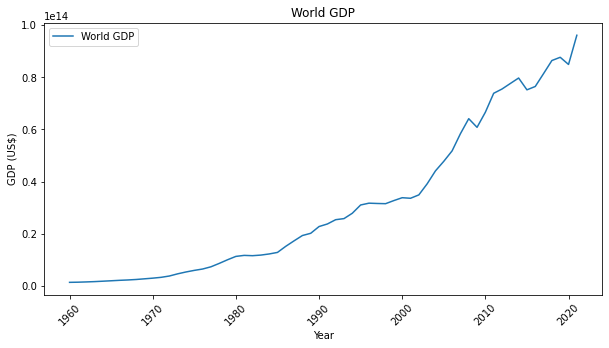

In [434]:
gdp_data = wb.download(indicator='NY.GDP.MKTP.CD', country='WLD', start='1960 ' , end='2021 ')
time = np.arange(1960,2022)
gdp = gdp_data.iloc[:,0].astype(float).to_numpy()
# Data is returned in inverse chronological order , so reverse order
gdp = np.flip (gdp)
# Plot world GDP data against time
plt.plot(time,gdp,label='World GDP')
plt.xlabel('Year')
plt.ylabel('GDP (US$)')
plt.title('World GDP')
plt.gca().tick_params(axis='x', rotation=45)
plt.gcf().set_size_inches(10, 5)
plt.legend()
plt.show()

For transformation you take logs of both sides. The log of the product ${GDP_0(1+r)^k}$ should equal the log sum of ${GDP_0}$ and ${(1+r)^k}$.

${log(GDP_0(1+r)^k) = log(GDP_0) + log((1+r)^k)}$

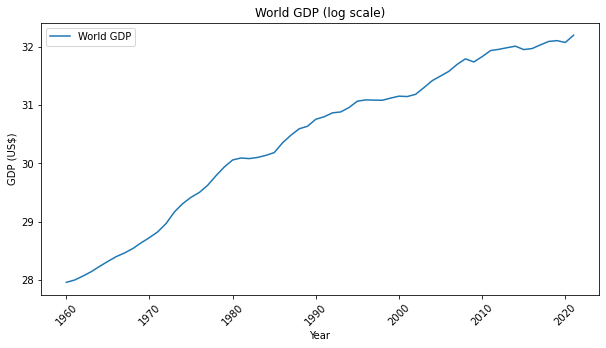

In [435]:
# convert to log scale
gdp_log = np.log(gdp)
plt.plot(time,gdp_log,label='World GDP')
plt.xlabel('Year')
plt.ylabel('GDP (US$)')
plt.title('World GDP (log scale)')
plt.gca().tick_params(axis='x', rotation=45)
plt.gcf().set_size_inches(10, 5)
plt.legend()
plt.show()

R^2 =  0.9657576197917564


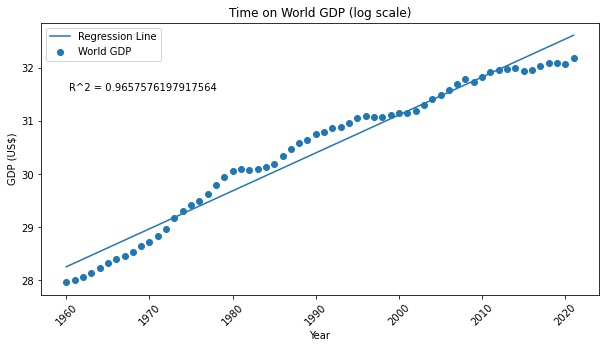

In [436]:
# regression against time

# add a column of ones to the time data
time = np.vstack((time,np.ones(len(time)))).T
# calculate the regression coefficients
m,c = np.linalg.lstsq(time,gdp_log,rcond=None)[0]

# calculate R^2 value
yhat = m*time[:,0]+c
SSres = np.sum((gdp_log-yhat)**2)
SStot = np.sum((gdp_log-np.mean(gdp_log))**2)

R2 = 1-SSres/SStot
print('R^2 = ',R2)

# plot the regression line and R^2 value
plt.plot(time[:,0],m*time[:,0]+c,label='Regression Line')
# plot the data
plt.scatter(time[:,0],gdp_log,label='World GDP')
plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP (US$)')
plt.title('Time on World GDP (log scale)')
plt.gca().tick_params(axis='x', rotation=45)
plt.gcf().set_size_inches(10, 5)
# add the R^2 value to the plot
plt.text(0.05,0.75,'R^2 = '+str(R2),transform=plt.gca().transAxes)
plt.show()


In [437]:
# compute the residuals
residuals = gdp_log - (m*time[:,0]+c)
# print the residuals mean and standard deviation
print('Residuals mean: ',np.mean(residuals))
print('Residuals standard deviation: ',np.std(residuals))

# perform ks test on residuals
from scipy.stats import kstest
print('KS test p-value: ',kstest(residuals,'norm')[1])
print(f'We reject the null hypothesis that the residuals are normally distributed at the 5% significance level because the p-value is {kstest(residuals,"norm")[1]} < 0.05')

Residuals mean:  -4.9909897003794135e-14
Residuals standard deviation:  0.24107101576840895
KS test p-value:  1.7472707766341742e-07
We reject the null hypothesis that the residuals are normally distributed at the 5% significance level because the p-value is 1.7472707766341742e-07 < 0.05


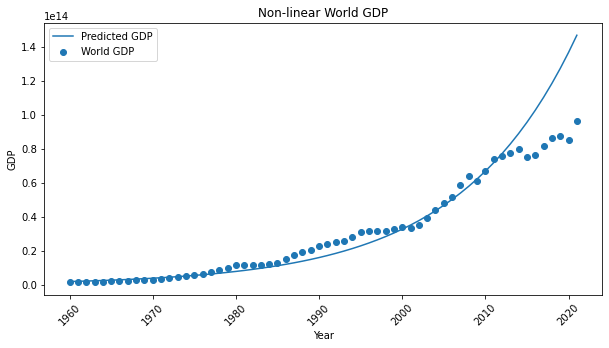

In [438]:
# invert the regression line to get the predicted GDP
gdp_pred = np.exp(m*time[:,0]+c)
# plot the predicted GDP
plt.plot(time[:,0],gdp_pred,label='Predicted GDP')
# plot the actual GDP
plt.scatter(time[:,0],gdp,label='World GDP')
plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Non-linear World GDP')
plt.gca().tick_params(axis='x', rotation=45)
plt.gcf().set_size_inches(10,5)
plt.show()

In [439]:
# Relationship between regression and long-run growth rate

###### The long-run growth rate is the exponential of the regression coefficient ######

# calculate the long-run growth rate
long_run_growth_rate = np.exp(m)-1
print('Long-run growth rate: ',long_run_growth_rate)

Long-run growth rate:  0.07416175185774443


In [440]:
# Observation since 2015 (year 56)

# calculate the growth rate since approx 2015
growth_rate = (gdp[-1]/gdp[56])**(1/56)-1
print(f'The growth rate since approximately 2015: {np.round(growth_rate, decimals= 4)}, is much lower than the long-run growth rate, signifying a period of slow growth for the world economy.')

The growth rate since approximately 2015: 0.0041, is much lower than the long-run growth rate, signifying a period of slow growth for the world economy.


# **Question 2**

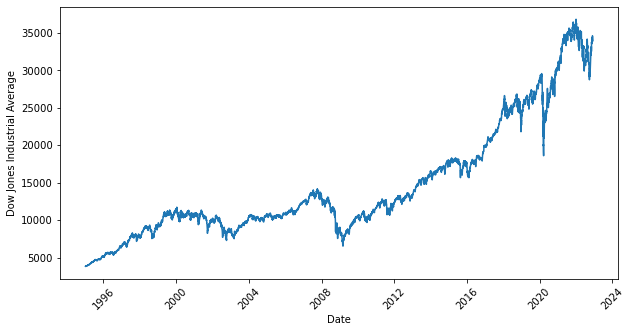

In [441]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt

data = web.DataReader('^DJI', 'yahoo', start='1995-01-01', end=' 2022-12-05')
data = data.reset_index() 
dates = data["Date"]
dow = data["Close"].to_numpy()
plt.plot(dates,dow)
plt.xlabel('Date')
plt.ylabel('Dow Jones Industrial Average')
plt.gca().tick_params(axis='x', rotation=45)
plt.gcf().set_size_inches(10,5)
plt.show()

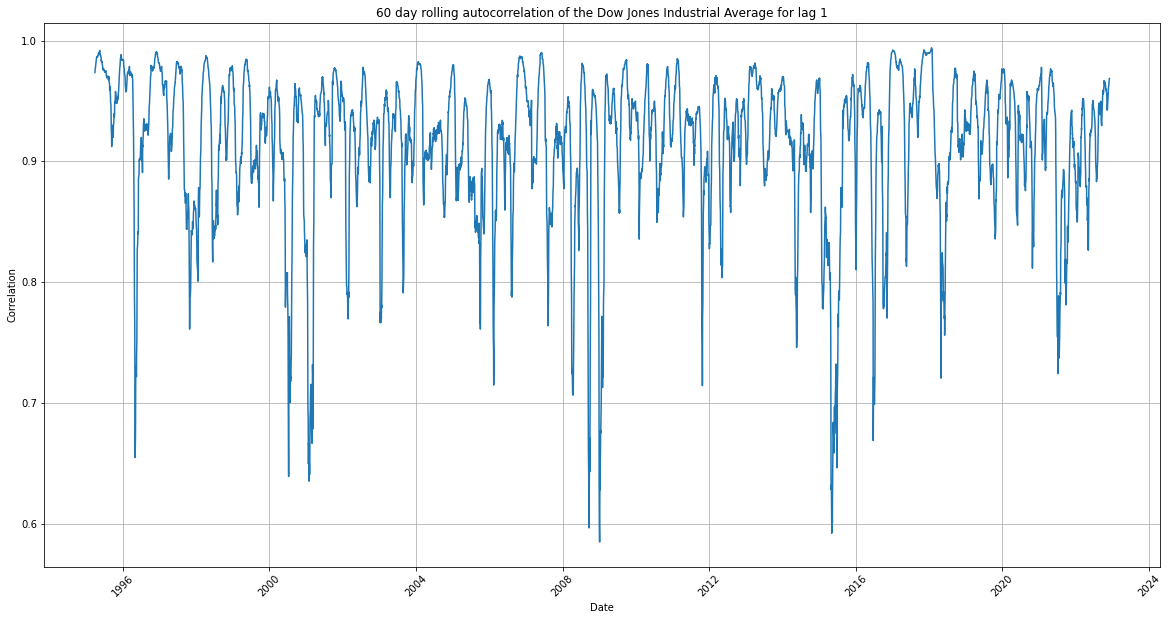

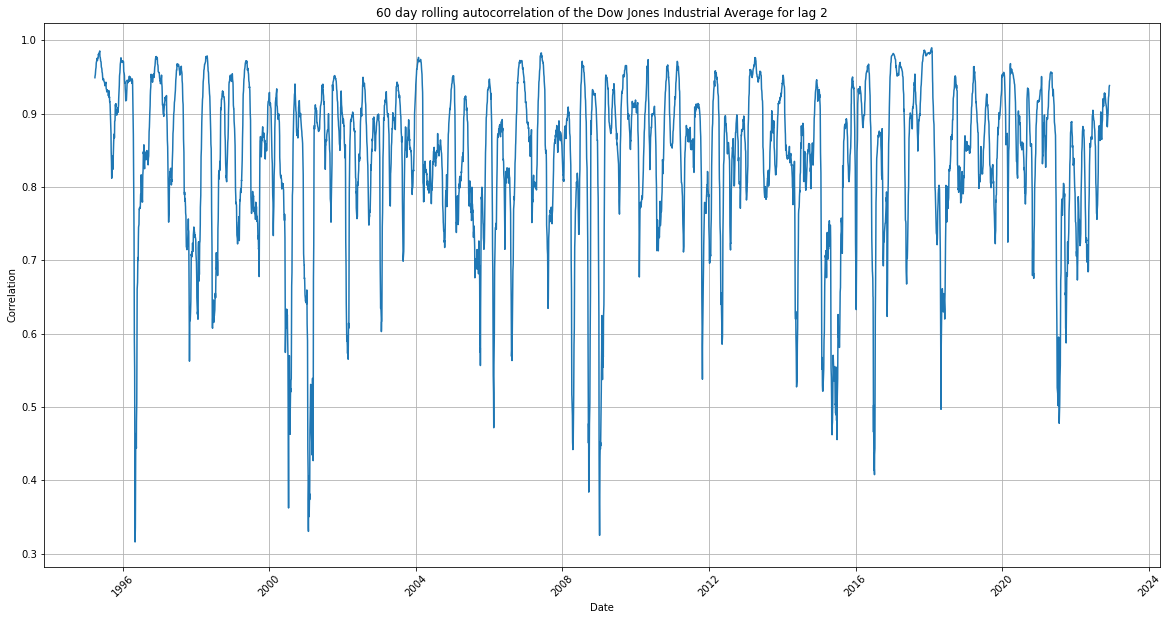

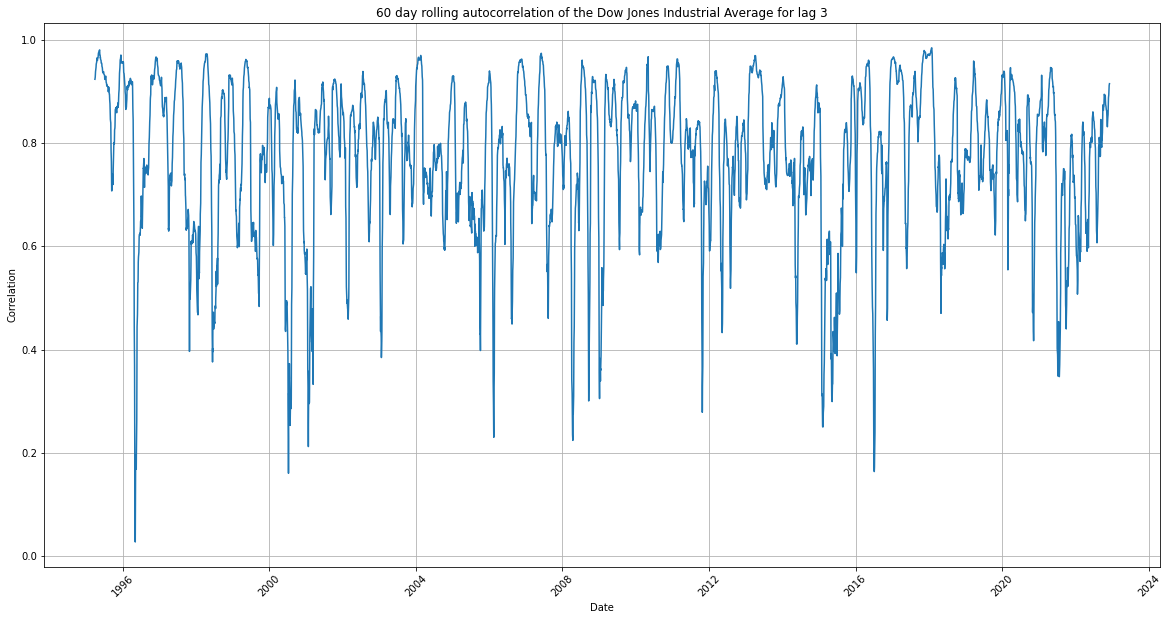

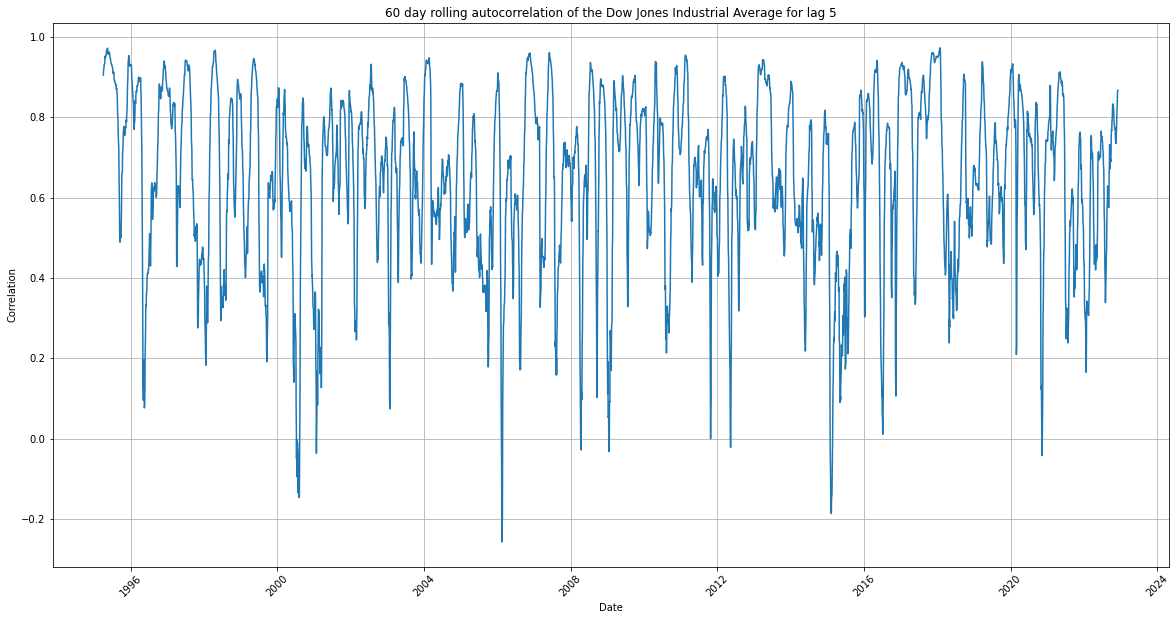

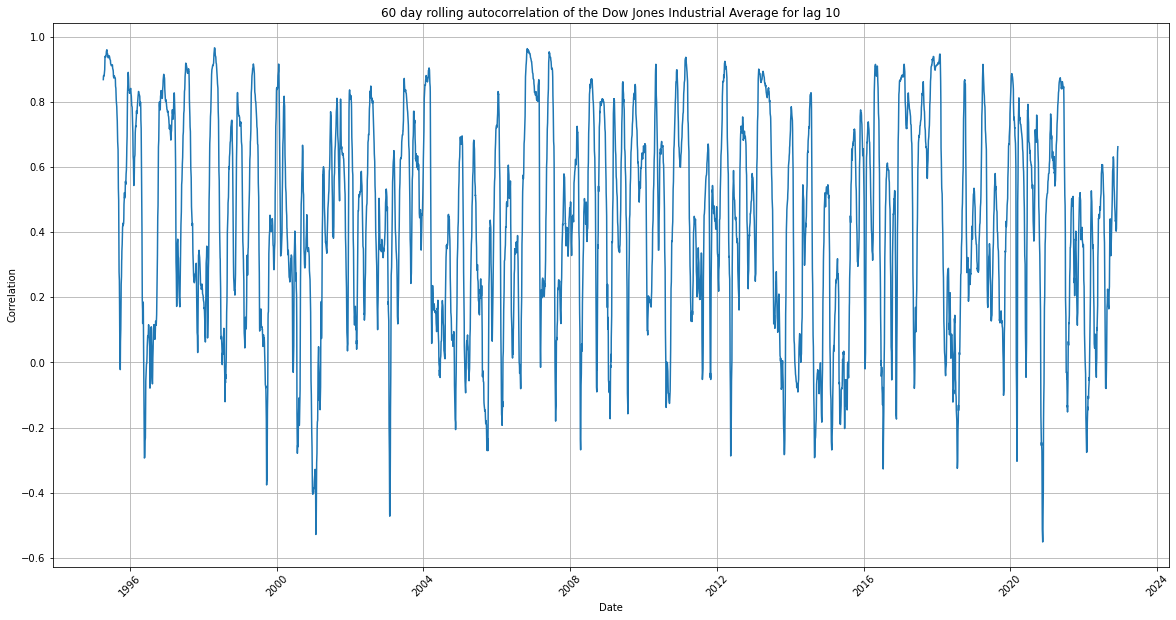

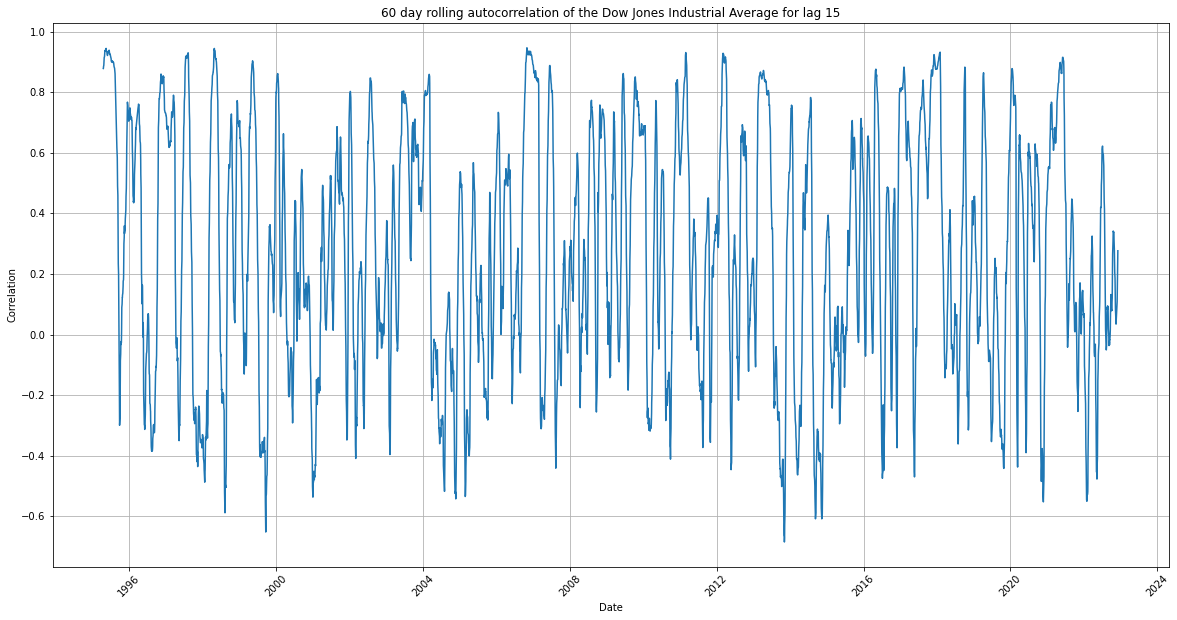

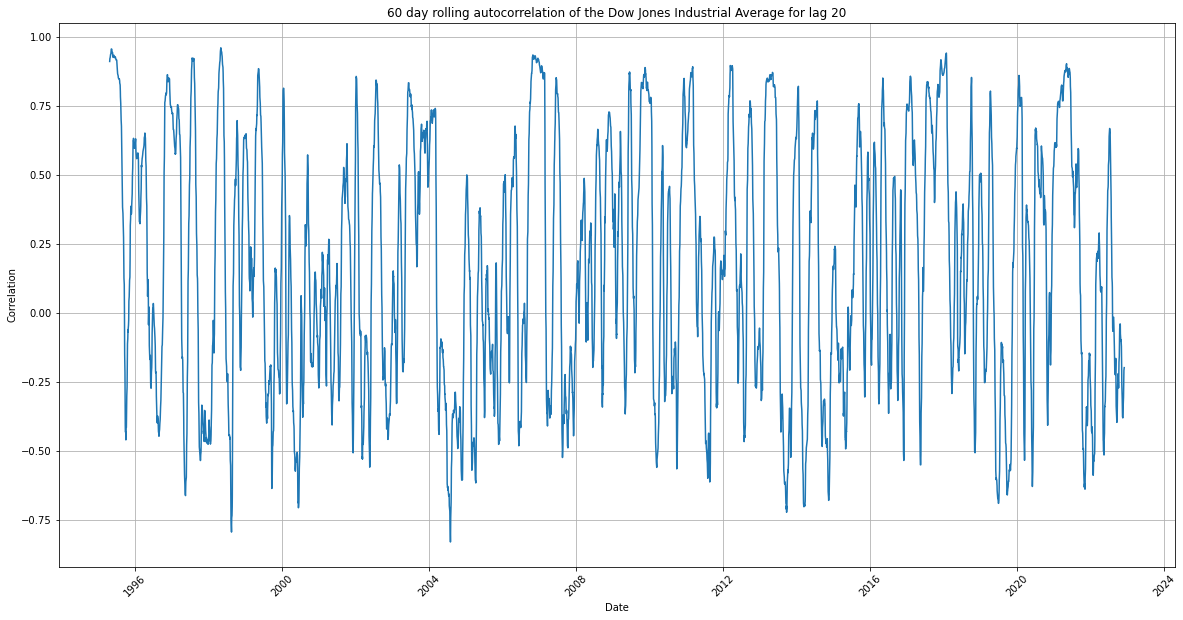

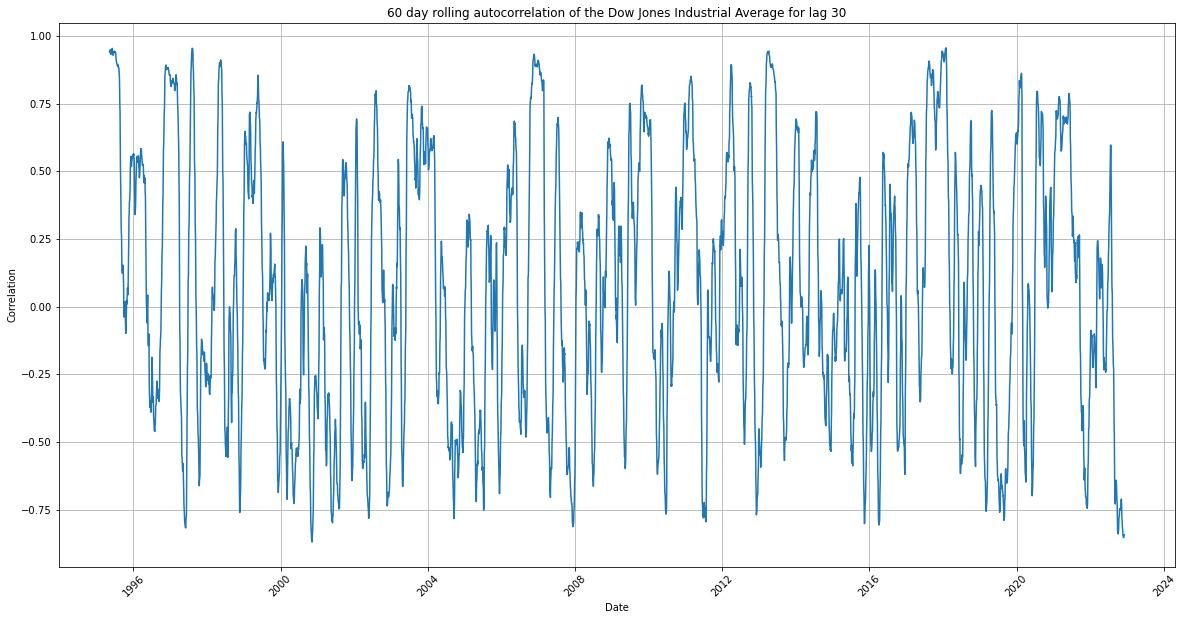

In [442]:
lags = [1,2,3,5,10,15,20,30]

# plot history of 60 day rolling autocorrelation of the Dow Jones Industrial Average for each lag
for lag in lags:
    fig, ax = plt.subplots()
    ax.plot(dates[60:],data["Close"].rolling(60).corr(data["Close"].shift(lag))[60:])
    ax.set_title(f'60 day rolling autocorrelation of the Dow Jones Industrial Average for lag {lag}')
    ax.axis('tight')
    ax.set_xlabel('Date')
    ax.set_ylabel('Correlation')
    ax.grid(True)
    # axis size
    fig.set_size_inches(20, 10)
    fig.gca().tick_params(axis='x', rotation=45)
    plt.show()

Average of 60 day rolling autocorrelation of the Dow Jones Industrial Average with lag 1 is nan
Average of 60 day rolling autocorrelation of the Dow Jones Industrial Average with lag 2 is -0.002424069585056324
Average of 60 day rolling autocorrelation of the Dow Jones Industrial Average with lag 3 is 0.005943602564884335
Average of 60 day rolling autocorrelation of the Dow Jones Industrial Average with lag 5 is -0.013663960143754815
Average of 60 day rolling autocorrelation of the Dow Jones Industrial Average with lag 10 is 0.040602182958745
Average of 60 day rolling autocorrelation of the Dow Jones Industrial Average with lag 15 is 0.024238955280122276
Average of 60 day rolling autocorrelation of the Dow Jones Industrial Average with lag 20 is 0.018595559794222914
Average of 60 day rolling autocorrelation of the Dow Jones Industrial Average with lag 30 is 0.00908954022275157


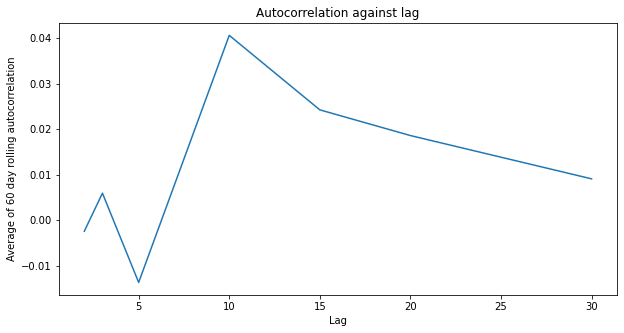

In [443]:
# Compute average of 60 day rolling autocorrelation of the Dow Jones Industrial Average
for lag in lags:
    print(f'Average of 60 day rolling autocorrelation of the Dow Jones Industrial Average with lag {lag} is {data["Close"].rolling(lag).corr(data["Close"].shift(lag)).mean()}')

# plot autocorrelation against lag
plt.plot(lags, [data["Close"].rolling(lag).corr(data["Close"].shift(lag)).mean() for lag in lags])
plt.xlabel('Lag')
plt.ylabel('Average of 60 day rolling autocorrelation')
plt.title('Autocorrelation against lag')
plt.gcf().set_size_inches(10,5)
plt.show()

**Looking at the average of the autocorrelation, there is some level of autocorrelation between the time lags. This suggest that the Dow Jones industry average is not a white noise process. A way to improve the model would be by smoothing the time series. We can do this by calculating the daily returns.**

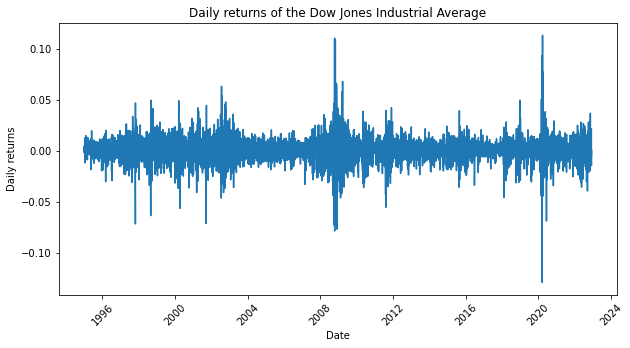

In [444]:
# Compute daily returns of the Dow Jones Industrial Average
returns = data["Close"].pct_change()
# plot the daily returns
plt.plot(dates, returns)
plt.xlabel('Date')
plt.ylabel('Daily returns')
plt.title('Daily returns of the Dow Jones Industrial Average')
plt.gca().tick_params(axis='x', rotation=45)
plt.gcf().set_size_inches(10,5)
plt.show()


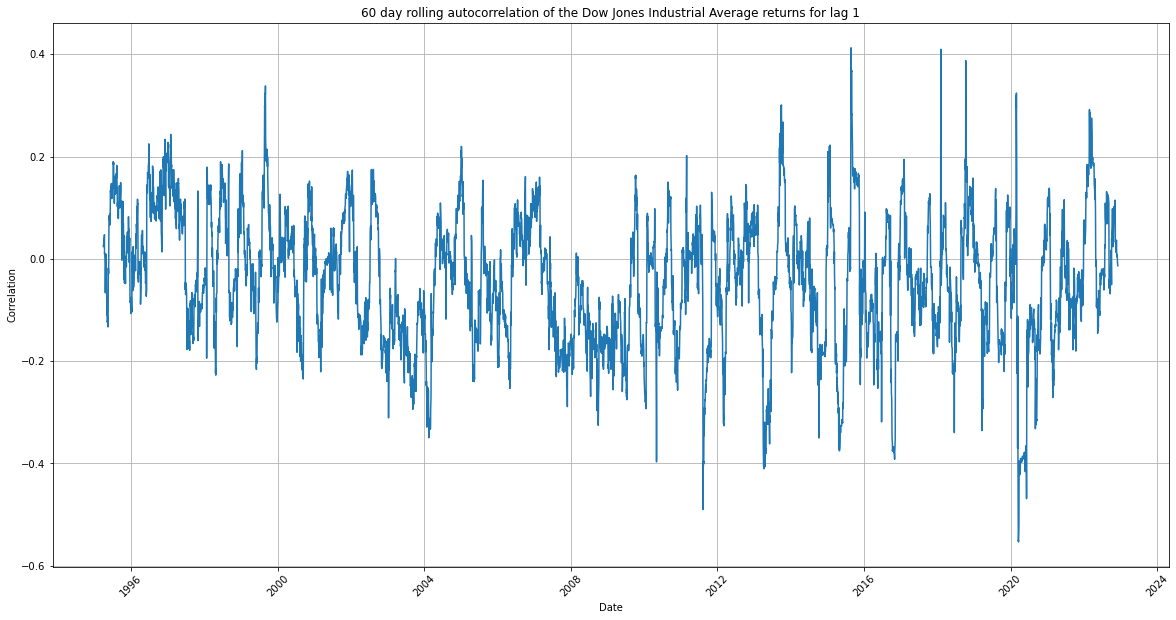

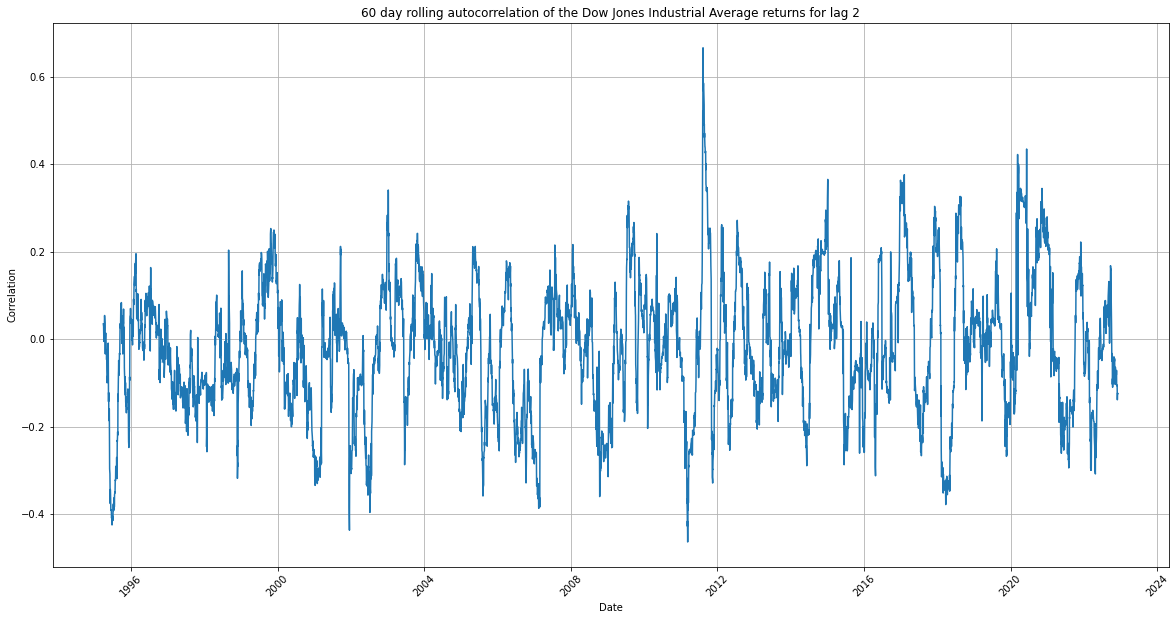

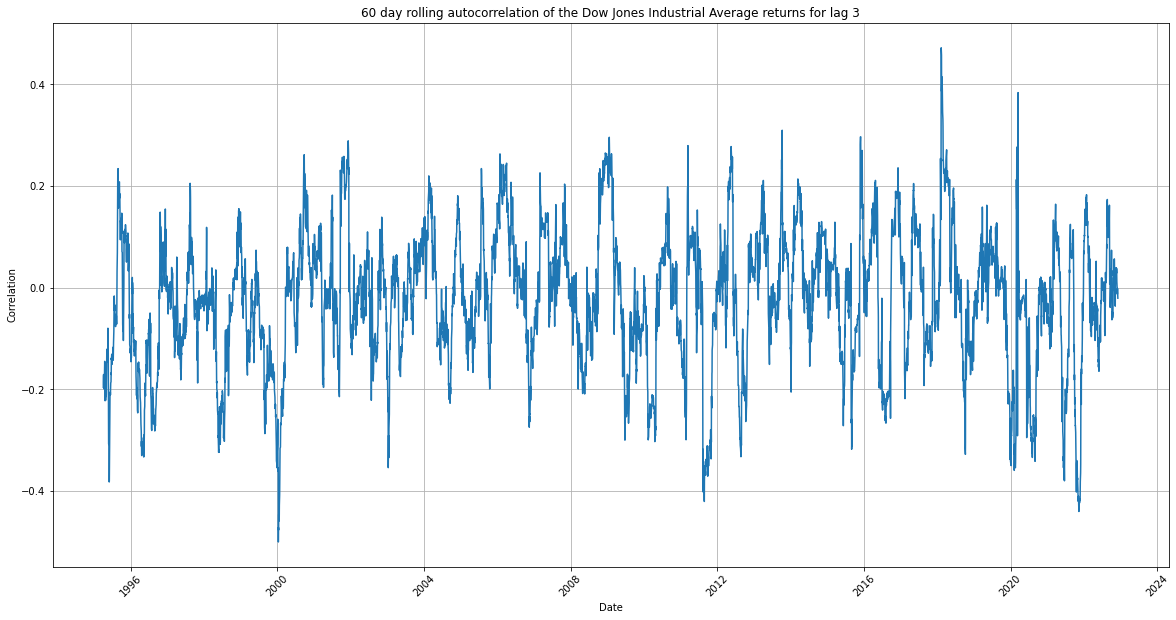

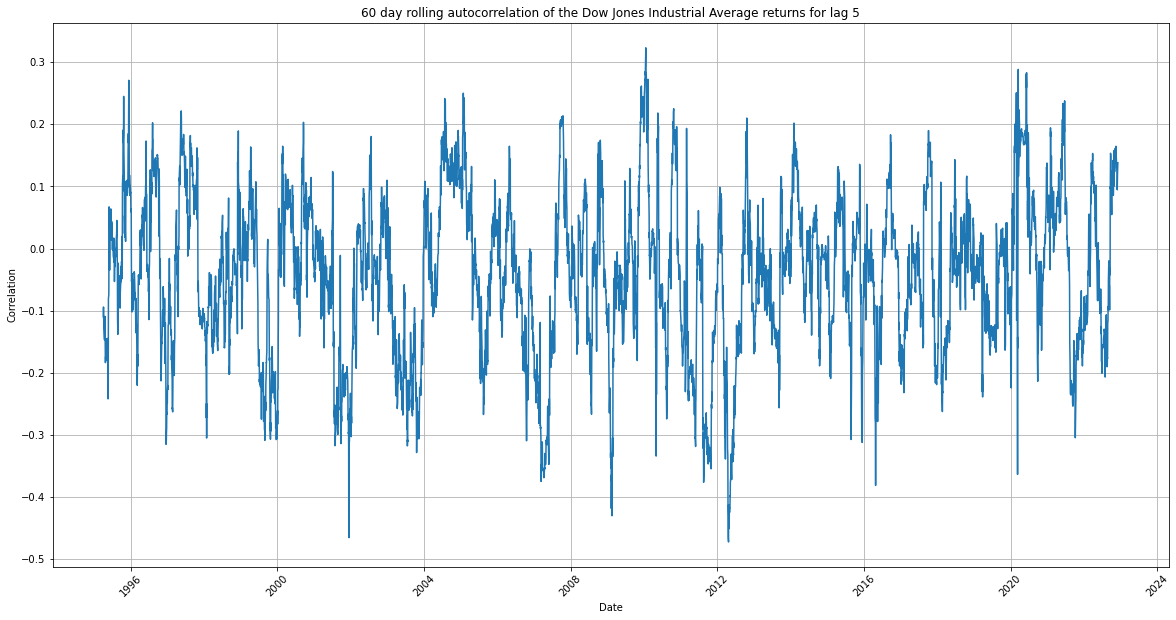

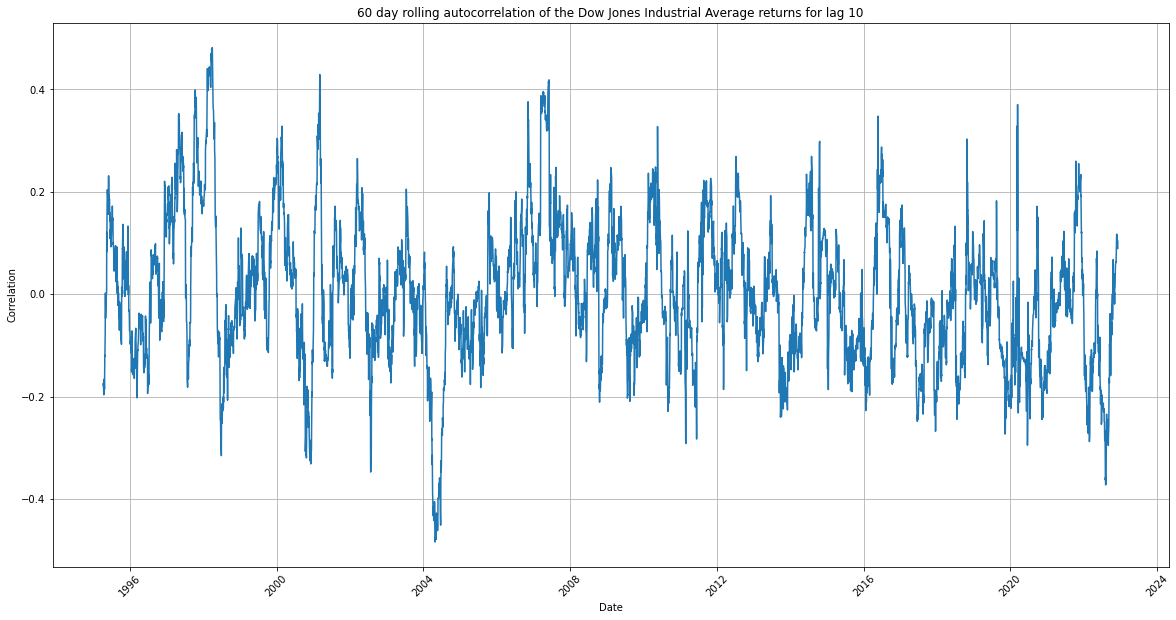

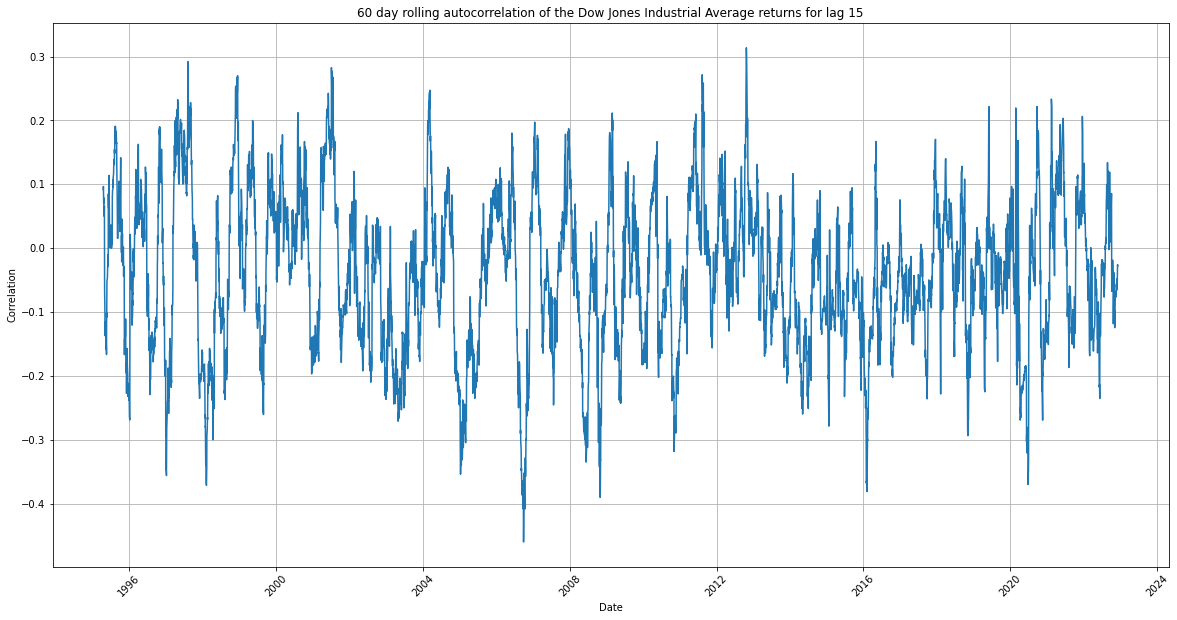

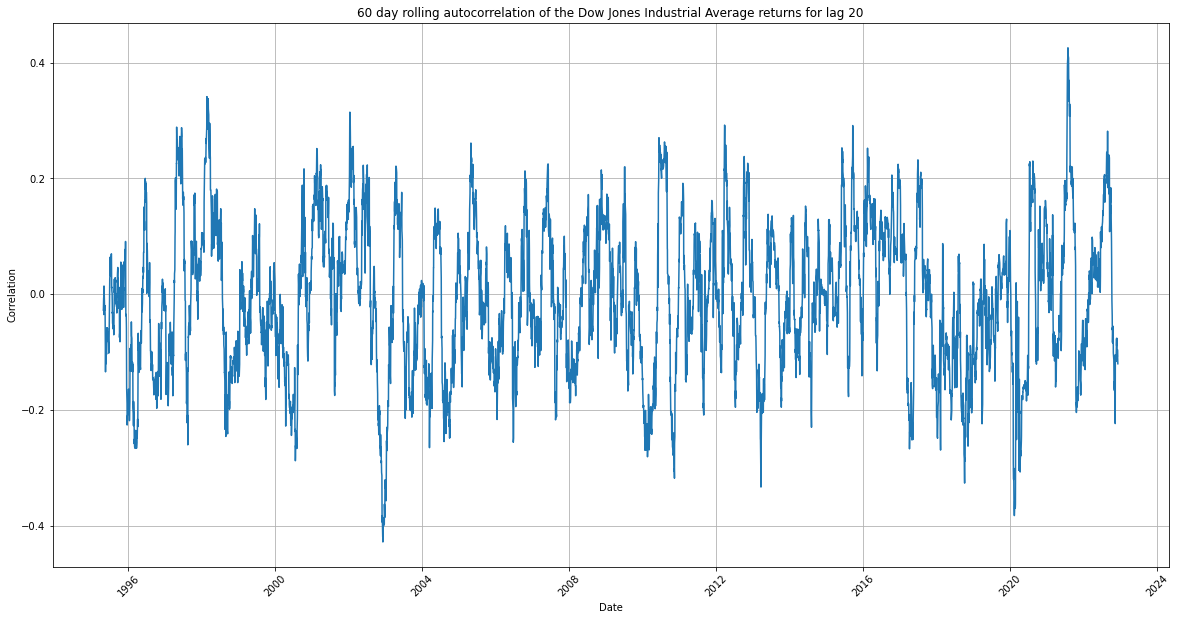

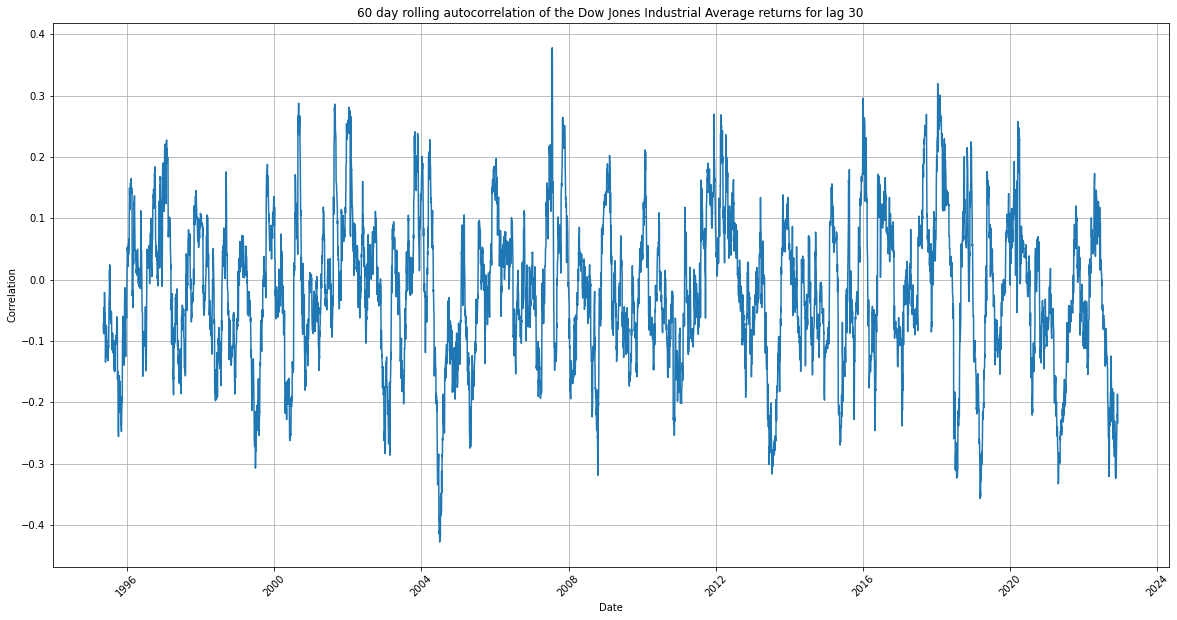

In [445]:
lags = [1,2,3,5,10,15,20,30]
# plot history of 60 day rolling autocorrelation of the Dow Jones Industrial Average returns for each lag
for lag in lags:
    fig, ax = plt.subplots()
    ax.plot(dates[60:],returns.rolling(60).corr(returns.shift(lag))[60:])
    ax.set_title(f'60 day rolling autocorrelation of the Dow Jones Industrial Average returns for lag {lag}')
    ax.axis('tight')
    ax.set_xlabel('Date')
    ax.set_ylabel('Correlation')
    ax.grid(True)
    # axis size
    fig.set_size_inches(20, 10)
    fig.gca().tick_params(axis='x', rotation=45)
    plt.show()

Average of 60 day rolling autocorrelation of the Dow Jones Industrial Average returns with lag 1 is nan
Average of 60 day rolling autocorrelation of the Dow Jones Industrial Average returns with lag 2 is 0.015367103015678145
Average of 60 day rolling autocorrelation of the Dow Jones Industrial Average returns with lag 3 is 0.0021770302161401413
Average of 60 day rolling autocorrelation of the Dow Jones Industrial Average returns with lag 5 is -0.018071084311688378
Average of 60 day rolling autocorrelation of the Dow Jones Industrial Average returns with lag 10 is 0.013523373249563403
Average of 60 day rolling autocorrelation of the Dow Jones Industrial Average returns with lag 15 is -0.019460644729540497
Average of 60 day rolling autocorrelation of the Dow Jones Industrial Average returns with lag 20 is -6.964259473336268e-05
Average of 60 day rolling autocorrelation of the Dow Jones Industrial Average returns with lag 30 is -0.009777509678233915


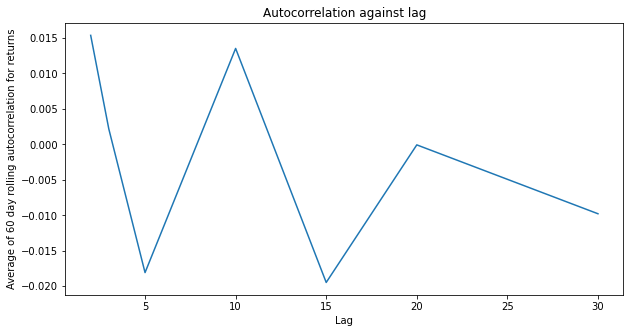

In [446]:
# Compute average of 60 day rolling autocorrelation of the Dow Jones Industrial Average returns
for lag in lags:
    print(f'Average of 60 day rolling autocorrelation of the Dow Jones Industrial Average returns with lag {lag} is {returns.rolling(lag).corr(returns.shift(lag)).mean()}')

# plot autocorrelation against lag
plt.plot(lags, [returns.rolling(lag).corr(returns.shift(lag)).mean() for lag in lags])
plt.xlabel('Lag')
plt.ylabel('Average of 60 day rolling autocorrelation for returns')
plt.title('Autocorrelation against lag')
plt.gcf().set_size_inches(10,5)
plt.show()

**Looking at the average of the autocorrelation for daily returns, there is still some level of autocorrelation between the time lags but much less than the Dow industry average. Using the graph, we can say this model is white noise process as the autocorrelation is very insignificant, with lag 20 being equal to 0.**